In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from scipy.stats import norm
import math as m
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

ModuleNotFoundError: No module named 'plotly'

In [189]:
# from google.colab import drive
# drive.mount('/content/gdrive/')
# import sys
# import os
# sys_path = '/content/gdrive/My Drive/'
# # modify "customized_path_to_your_homework" here to where you uploaded your homework
# sys.path.append(sys_path)

In [190]:
df = pd.read_csv('may-movie-data-final.csv')

In [191]:
# null values in each column
df.isnull().sum()

Movie Title                       0
tmdb_popularity                   0
imdbRating                        0
imdbNumVotes                      0
runtimeMinutes                    0
Score_Rotten                    247
Score_Rotten_Audience           185
Rating                            0
NumTheatres                     311
mean_google_trend_popularity     93
director_popularity             278
producer_popularity             243
actors_popularity                 8
TwitterScore                     65
Budget                            0
Action                            0
Adventure                         0
Animation                         0
Biography                         0
Comedy                            0
Crime                             0
Documentary                       0
Drama                             0
Family                            0
Fantasy                           0
Film-Noir                         0
History                           0
Horror                      

total null values

In [192]:
df.describe()

,tmdb_popularity,imdbRating,imdbNumVotes,runtimeMinutes,Score_Rotten,Score_Rotten_Audience,Rating,NumTheatres,mean_google_trend_popularity,director_popularity,...,Sport,Thriller,War,Western,Release-Year,Release-Month,Release-DOM,Revenue-Worldwide,Profit,Label
count,1618.000000,1618.000000,1.618000e+03,1618.000000,1371.000000,1433.000000,1618.000000,1307.000000,1525.000000,1340.000000,...,1618.000000,1618.000000,1618.000000,1618.000000,1572.000000,1572.000000,1572.000000,1.618000e+03,1618.000000,1618.000000
mean,90.629623,6.424475,1.511315e+05,111.852905,57.396791,62.952547,2.124227,68.172915,47.062295,7.091651,...,0.012979,0.152658,0.008035,0.004326,2015.278626,6.734733,16.218193,1.770335e+08,9.940162,0.833745
std,317.576346,0.973880,2.012969e+05,19.117367,27.049834,19.633741,0.682872,44.564705,15.983062,6.503903,...,0.113219,0.359768,0.089303,0.065653,3.407032,3.545143,8.366302,2.569134e+08,199.826489,0.886328
min,0.600000,1.600000,1.500000e+01,48.000000,0.000000,0.000000,0.000000,1.000000,12.500000,0.600000,...,0.000000,0.000000,0.000000,0.000000,2009.000000,1.000000,1.000000,1.440030e+05,-0.997019,0.000000
25%,18.383500,5.800000,2.527325e+04,98.000000,35.000000,48.000000,2.000000,31.000000,36.875000,2.835500,...,0.000000,0.000000,0.000000,0.000000,2012.000000,3.000000,9.000000,3.881412e+07,0.680118,0.000000
50%,35.766000,6.500000,8.444800e+04,109.000000,61.000000,64.000000,2.000000,63.000000,43.750000,5.452000,...,0.000000,0.000000,0.000000,0.000000,2015.000000,7.000000,17.000000,8.052874e+07,1.922937,1.000000
75%,79.029000,7.100000,1.896638e+05,123.000000,81.000000,80.000000,3.000000,101.000000,55.125000,8.616000,...,0.000000,0.000000,0.000000,0.000000,2018.000000,10.000000,23.000000,1.966145e+08,4.239644,2.000000
max,7358.500000,8.800000,2.255111e+06,212.000000,100.000000,100.000000,5.000000,199.000000,98.000000,39.917000,...,1.000000,1.000000,1.000000,1.000000,2022.000000,12.000000,31.000000,2.797801e+09,7999.000000,2.000000


In [193]:
li_movies = []
li_movies = df['Movie Title']

In [194]:
df.columns

Index(['Movie Title', 'tmdb_popularity', 'imdbRating', 'imdbNumVotes',
       'runtimeMinutes', 'Score_Rotten', 'Score_Rotten_Audience', 'Rating',
       'NumTheatres', 'mean_google_trend_popularity', 'director_popularity',
       'producer_popularity', 'actors_popularity', 'TwitterScore', 'Budget',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Thriller', 'War', 'Western', 'Release-Date', 'Release-Year',
       'Release-Month', 'Release-DOM', 'Revenue-Worldwide', 'Profit', 'Label'],
      dtype='object')

In [195]:
df = df.drop(['Movie Title'],axis = 1)

# Replacing Missing values - Mean values

In [196]:
df['Score_Rotten'] = df['Score_Rotten'].fillna(m.ceil(df['Score_Rotten'].mean()))
feature =  'Score_Rotten_Audience'
df[feature] = df[feature].fillna(m.ceil(df[feature].mean()))
feature =  'NumTheatres'
df[feature] = df[feature].fillna(m.ceil(df[feature].mean()))
feature =  'mean_google_trend_popularity'
df[feature] = df[feature].fillna(round(df[feature].mean(), 3))
feature =  'director_popularity'
df[feature] = df[feature].fillna(round(df[feature].mean(), 3))
feature =  'producer_popularity'
df[feature] = df[feature].fillna(round(df[feature].mean(), 3))
feature =  'actors_popularity'
df[feature] = df[feature].fillna(round(df[feature].mean(), 3))
feature =  'TwitterScore'
df[feature] = df[feature].fillna(round(df[feature].mean(), 3))
feature =  'Release-DOM'
df[feature] = df[feature].fillna(int(m.ceil(df[feature].mean())))
feature =  'Release-Month'
df[feature] = df[feature].fillna(int(m.ceil(df[feature].mean())))
feature =  'Release-Year'
df[feature] = df[feature].fillna(int(m.ceil(df[feature].mean())))
df.rename(columns = {'Release-Year':'year', 'Release-Month':'month', 'Release-DOM':'day'}, inplace = True)
df['Release-Date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [197]:
li = []
li = df['Release-Date']
df = df.drop(['Release-Date'],axis = 1)

In [198]:
# release_li =[]
# for index, row in df.iterrows():
#   release_li.append(str(int(row['Release-Year']))+"-"+str(int(row['Release-Month']))+"-"+str(int(row['Release-DOM'])))

In [199]:
df = df.drop(['year','month','day'],axis=1)

In [200]:
print(li)

0      2018-10-31
1      2010-07-22
2      2021-04-02
3      2014-03-14
4      2011-04-23
          ...    
1613   2022-03-04
1614   2022-04-22
1615   2022-01-21
1616   2022-01-21
1617   2022-03-18
Name: Release-Date, Length: 1618, dtype: datetime64[ns]


In [201]:
df.rename(columns = {'Revenue-Worldwide':'Revenue'}, inplace = True)

In [202]:

# release_li= pd.to_datetime(release_li) #converting into panda date time

In [203]:
# release_df = {'release_date': release_li}
# release_df = pd.DataFrame(release_df)

In [204]:
#release_df = li.copy()
release_df= {'Release-Date':li.copy()}

In [205]:
def process_date(df_date):
    '''this function add column like 
     year, weeekday, month and so on column
    and add prefix of release_date before 
    all the above column eg realease_date_year'''
    date_parts = ["year", "weekday", "month", 'weekofyear', 'day', 'quarter']
    for part in date_parts:
        part_col = 'release_date' + "_" + part #add prefix as  "release_date" before the columne
        df[part_col] = getattr(release_df['Release-Date'].dt, part).astype(int)
    
    return df_date

In [206]:
df = process_date(df)

/state/partition1/job-18980707/ipykernel_1469299/2304649822.py:9: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



# Exploratory Data Analysis

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



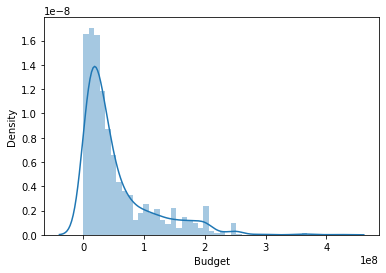

In [207]:
sns.distplot(df.Budget);

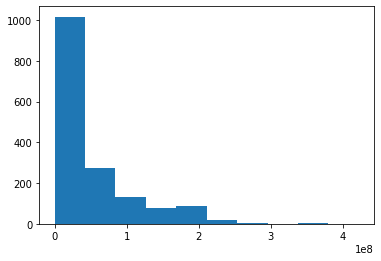

In [208]:
plt.hist(df['Budget']);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



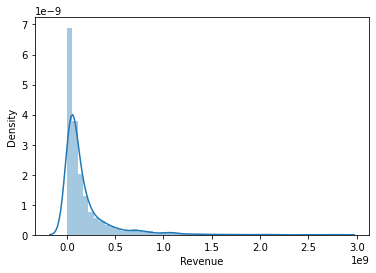

In [209]:
sns.distplot(df.Revenue);

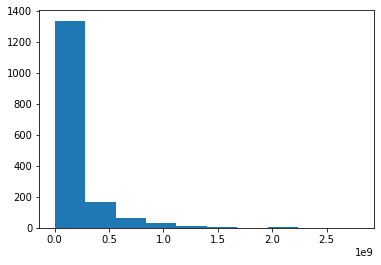

In [210]:
plt.hist(df['Revenue']);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



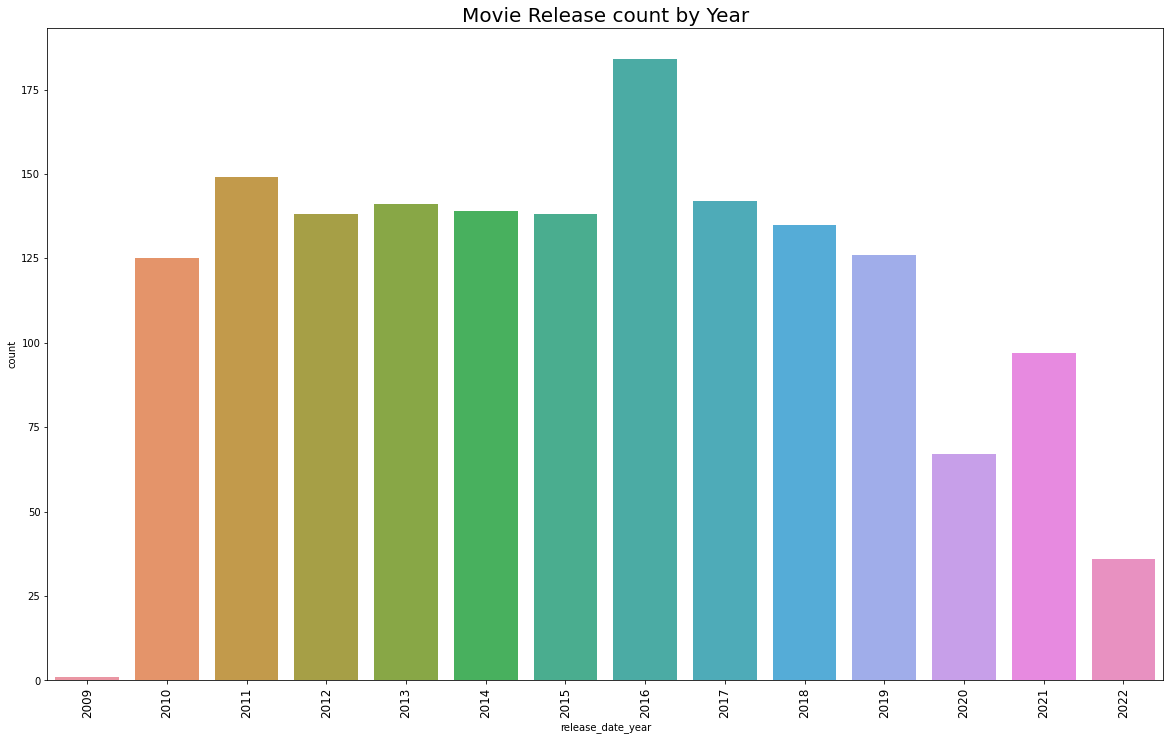

In [211]:
#countplot chart for movies release year
plt.figure(figsize=(20,12))
sns.countplot(df['release_date_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [212]:
#plot for release date vs revenue
d1 = df['release_date_year'].value_counts().sort_index()
d2 = df.groupby(['release_date_year'])['Revenue'].mean()

data = [go.Scatter(x=d1.index, y=d1.values, name='film count'),
        go.Scatter(x=d2.index, y=d2.values, name='mean revenue', yaxis='y2')]

layout = go.Layout(dict(title = "Number of films and average revenue per year",
                  xaxis = dict(title = 'Year'),
                  yaxis = dict(title = 'Count'),
                  yaxis2=dict(title='Average revenue', overlaying='y', side='right')
                  ),legend=dict(
                orientation="v"))
py.iplot(dict(data=data, layout=layout))

<Figure size 1440x360 with 0 Axes>

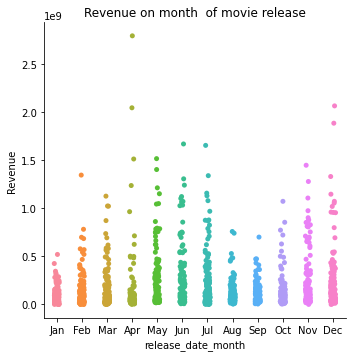

In [213]:
#since day, month are categorical variable
plt.figure(figsize=(20,5));
sns.catplot(x='release_date_month', y='Revenue', data=df);
plt.title('Revenue on month  of movie release');
#lets replace number by actual month name
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=10)
plt.show()

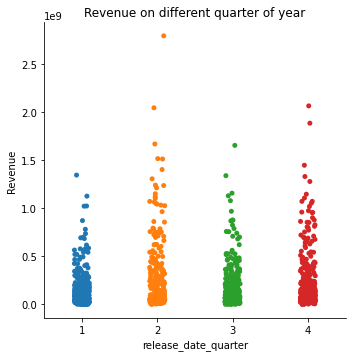

In [214]:
sns.catplot(x='release_date_quarter', y='Revenue', data=df);
plt.title('Revenue on different quarter of year');

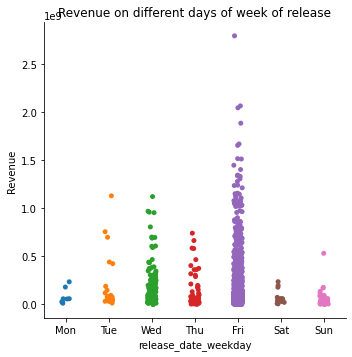

In [215]:
sns.catplot(x='release_date_weekday', y='Revenue', data=df);
plt.title('Revenue on different days of week of release');
loc, labels = plt.xticks()
#putting label for days
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels)
plt.show()

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



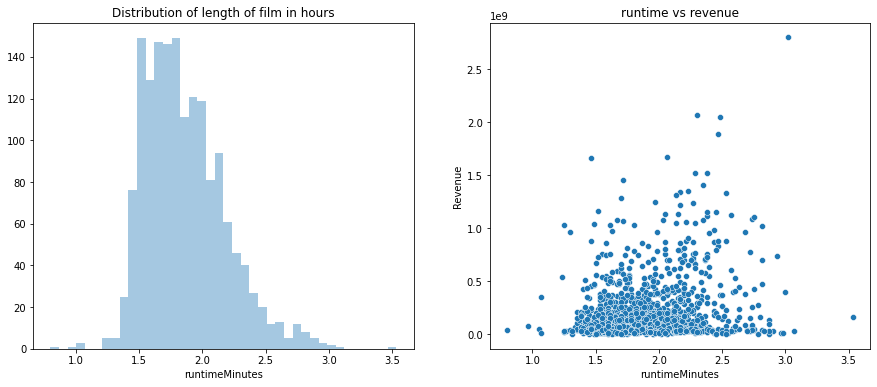

In [216]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(df['runtimeMinutes'].fillna(0) / 60, bins=40, kde=False); #filling runtime with 0 if there were any missing values
plt.title('Distribution of length of film in hours');
plt.subplot(1, 2, 2)
sns.scatterplot(df['runtimeMinutes'].fillna(0)/60, df['Revenue'])
plt.title('runtime vs revenue');

In [217]:
output = []
output = df['Revenue']

In [218]:
df.shape

(1618, 46)

In [219]:
df.columns

Index(['tmdb_popularity', 'imdbRating', 'imdbNumVotes', 'runtimeMinutes',
       'Score_Rotten', 'Score_Rotten_Audience', 'Rating', 'NumTheatres',
       'mean_google_trend_popularity', 'director_popularity',
       'producer_popularity', 'actors_popularity', 'TwitterScore', 'Budget',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Thriller', 'War', 'Western', 'Revenue', 'Profit', 'Label',
       'release_date_year', 'release_date_weekday', 'release_date_month',
       'release_date_weekofyear', 'release_date_day', 'release_date_quarter'],
      dtype='object')

# Dummy Encoding Categorical data

In [220]:
df_numeric = df.filter(['tmdb_popularity', 'imdbRating','imdbNumVotes','runtimeMinutes','Score_Rotten', 'Score_Rotten_Audience',
                                         'NumTheatres','mean_google_trend_popularity', 'director_popularity',
'producer_popularity', 'actors_popularity', 'TwitterScore', 'Budget','Revenue','Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History',
       'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short',
       'Sport', 'Thriller', 'War', 'Western'],axis = 1)

In [221]:
df_numeric

,tmdb_popularity,imdbRating,imdbNumVotes,runtimeMinutes,Score_Rotten,Score_Rotten_Audience,NumTheatres,mean_google_trend_popularity,director_popularity,producer_popularity,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,2.791,6.6,160,100,58.0,82.0,69.0,41.250,1.164,4.82800,...,0,0,0,0,0,0,0,0,0,0
1,17.804,4.8,11745,89,100.0,63.0,69.0,60.625,7.092,0.64750,...,0,0,0,0,0,0,0,0,0,0
2,1.342,6.8,383,115,58.0,63.0,69.0,12.500,7.092,4.82800,...,0,0,0,0,0,0,0,0,0,0
3,0.948,5.3,85,93,58.0,63.0,69.0,29.750,7.092,0.60000,...,0,0,0,0,0,0,0,0,0,0
4,40.465,6.4,7731,130,58.0,58.0,69.0,46.625,5.113,1.55300,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,15.273,7.0,38061,152,91.0,97.0,55.0,61.250,1.367,0.98350,...,0,0,0,0,0,0,0,0,0,0
1614,708.384,7.0,1474,100,88.0,63.0,69.0,64.875,2.848,0.93700,...,0,0,0,0,0,0,0,0,0,0
1615,7.013,4.5,329,102,17.0,73.0,53.0,21.375,0.656,0.60000,...,0,0,0,0,0,0,0,0,0,0
1616,172.511,5.1,2689,90,18.0,80.0,43.0,55.000,7.761,2.67475,...,0,0,0,0,0,0,0,0,0,0


In [222]:
li_1 = []
li_1 = df['release_date_year']
li_2 = []
li_2 = df['Rating']
li_3 = []
li_3 = df['release_date_quarter']

In [223]:
df_category =  pd.DataFrame([],columns = ['release_date_year', 'Rating', 'release_date_quarter'])

In [224]:
df_category['release_date_year'] = df['release_date_year']
df_category['release_date_quarter'] = df['release_date_quarter']
df_category['Rating'] = df['Rating']

In [225]:
df_category.head()

,release_date_year,Rating,release_date_quarter
0,2018,2,4
1,2010,2,3
2,2021,2,2
3,2014,2,1
4,2011,2,2


In [226]:
one_hot_df = pd.get_dummies(df_category,columns = ['release_date_year',
                                        'Rating','release_date_quarter'], prefix={'release_date_year':'release_date_year_',
                                        'Rating':'Rating_',
                                        'release_date_quarter':'release_date_quarter_'},
                            drop_first=True)

In [227]:
one_hot_df

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,release_date_year__2021,release_date_year__2022,Rating__1,Rating__2,Rating__3,Rating__4,Rating__5,release_date_quarter__2,release_date_quarter__3,release_date_quarter__4
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1614,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
1615,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1616,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [228]:
df = pd.concat([one_hot_df,df_numeric],axis = 1)

In [229]:
df.columns

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [230]:
df.isnull().sum()

release_date_year__2010         0
release_date_year__2011         0
release_date_year__2012         0
release_date_year__2013         0
release_date_year__2014         0
release_date_year__2015         0
release_date_year__2016         0
release_date_year__2017         0
release_date_year__2018         0
release_date_year__2019         0
release_date_year__2020         0
release_date_year__2021         0
release_date_year__2022         0
Rating__1                       0
Rating__2                       0
Rating__3                       0
Rating__4                       0
Rating__5                       0
release_date_quarter__2         0
release_date_quarter__3         0
release_date_quarter__4         0
tmdb_popularity                 0
imdbRating                      0
imdbNumVotes                    0
runtimeMinutes                  0
Score_Rotten                    0
Score_Rotten_Audience           0
NumTheatres                     0
mean_google_trend_popularity    0
director_popul

In [231]:
len(df.columns)

58

In [232]:
# Add movies
# new_df = df.copy()
# new_df['Movie Title'] = li_movies
# new_df.shape
# new_df.to_csv("FinalDataset.csv")

# Detecting outliers with DBSCAN

In [233]:
from scipy import stats

In [234]:
df.dtypes

release_date_year__2010           uint8
release_date_year__2011           uint8
release_date_year__2012           uint8
release_date_year__2013           uint8
release_date_year__2014           uint8
release_date_year__2015           uint8
release_date_year__2016           uint8
release_date_year__2017           uint8
release_date_year__2018           uint8
release_date_year__2019           uint8
release_date_year__2020           uint8
release_date_year__2021           uint8
release_date_year__2022           uint8
Rating__1                         uint8
Rating__2                         uint8
Rating__3                         uint8
Rating__4                         uint8
Rating__5                         uint8
release_date_quarter__2           uint8
release_date_quarter__3           uint8
release_date_quarter__4           uint8
tmdb_popularity                 float64
imdbRating                      float64
imdbNumVotes                      int64
runtimeMinutes                    int64


In [235]:
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

In [236]:
print(df.shape, new_df.shape)

(1618, 58) (101, 58)


In [237]:
print("Num outliers:", 1618-751)

Num outliers: 867


No of outliers are 867

# Using DB SCAN for outlier

[[0.00000000e+00 2.04105150e+04 1.54966278e+05 ... 6.43829985e+06
  6.45762623e+06 6.55560531e+06]
 [0.00000000e+00 2.04105150e+04 2.03135912e+05 ... 6.44768762e+06
  6.46099945e+06 6.55976757e+06]
 [0.00000000e+00 3.34828091e+04 2.07600690e+05 ... 6.48860452e+06
  6.50694346e+06 6.56901755e+06]
 ...
 [1.13137085e+01 1.74832817e+08 1.88985275e+08 ... 1.36249175e+09
  1.36576161e+09 1.36966028e+09]
 [1.60000000e+01 1.85757009e+08 2.02878781e+08 ... 1.37714581e+09
  1.38063558e+09 1.38112127e+09]
 [3.20000000e+01 7.37972579e+08 7.51530125e+08 ... 2.11364543e+09
  2.11698679e+09 2.11897235e+09]]
[2.04105150e+04 2.04105150e+04 3.34828091e+04 ... 1.74832817e+08
 1.85757009e+08 7.37972579e+08]


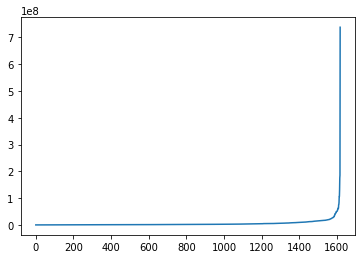

In [238]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
neighbors = NearestNeighbors(n_neighbors=88)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
distances = np.sort(distances, axis=0)
print(distances)
distances = distances[:,1]
print(distances)
plt.plot(distances)

(10000000.0, 100000000.0)

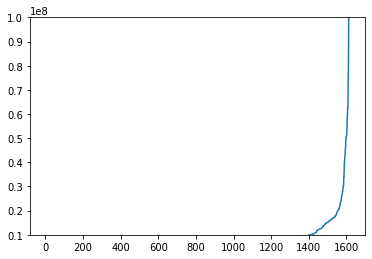

In [239]:
plt.plot(distances)

plt.ylim([10000000,100000000])

## epsilon can be taken as 25000000

In [378]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(eps =25000000, min_samples=30).fit(df)
print(len(outlier_detection.labels_))
n_outliers = np.count_nonzero(outlier_detection.labels_==-1)
print(n_outliers)

1618
DBSCAN(eps=25000000, min_samples=30)
392


In [386]:
ind_list = []
i = 0
lisi_out = np.array(outlier_detection.labels_)
print(type(lisi_out))
for val in lisi_out:
    if val == -1:
        ind_list.append(i)
    i+=1
print(len(ind_list))

<class 'numpy.ndarray'>
392


In [389]:
# df_copy = df.copy()
# df['Movie_Title'] = li_movies
# df.columns
# df_new = df.drop(ind_list, axis=0)
# df_new.shape
# df = df_new.copy()
# li_movies_new = df_new['Movie Title']
# df = df_new.drop('Movie Title', axis=1)

(1226, 59)

# Normalizing data

# Z-score normalization

In [241]:
z_df=(df-df.mean())/df.std()

In [242]:
z_df[z_df.columns[1:]].corr()['Revenue'][:].nlargest(n=44)

Revenue                         1.000000
Budget                          0.693505
imdbNumVotes                    0.630850
Adventure                       0.422015
actors_popularity               0.344022
imdbRating                      0.278273
Sci-Fi                          0.252660
runtimeMinutes                  0.240271
Score_Rotten_Audience           0.233112
Action                          0.215292
tmdb_popularity                 0.198446
director_popularity             0.195305
producer_popularity             0.190379
Score_Rotten                    0.171194
Animation                       0.164302
release_date_quarter__2         0.139522
Rating__1                       0.101123
Fantasy                         0.085215
release_date_year__2019         0.068816
Rating__2                       0.050067
release_date_year__2018         0.043567
release_date_quarter__4         0.042890
release_date_year__2015         0.033381
release_date_year__2017         0.026836
release_date_yea

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



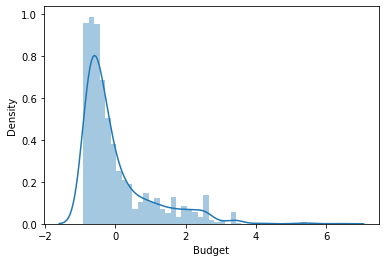

In [243]:
sns.distplot(z_df.Budget);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



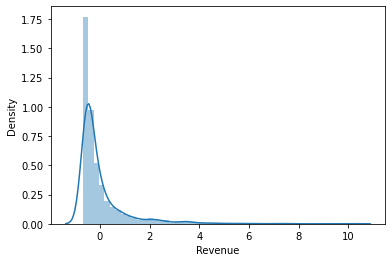

In [244]:
sns.distplot(z_df.Revenue);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



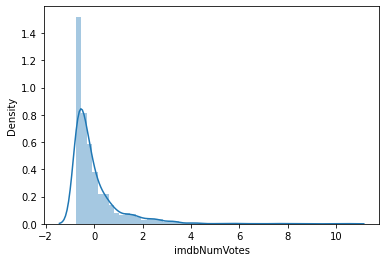

In [245]:
sns.distplot(z_df.imdbNumVotes);

In [246]:
z_df.describe()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,1618.000000,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,...,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03,1.618000e+03
mean,0.000000,3.513190e-17,7.026381e-17,3.513190e-17,1.053957e-16,8.782976e-17,2.634893e-17,1.053957e-16,-7.026381e-17,7.026381e-17,...,4.391488e-18,-2.634893e-17,-8.782976e-17,-8.782976e-17,-2.195744e-18,-2.195744e-18,-1.701702e-17,5.050211e-17,-2.634893e-17,-3.513190e-17
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-0.289262,-3.183816e-01,-3.052632e-01,-3.088766e-01,-3.064708e-01,-3.052632e-01,-3.580965e-01,-3.100750e-01,-3.016213e-01,-2.905137e-01,...,-1.591630e-01,-8.997045e-02,-3.112704e-01,-3.700672e-01,-3.148388e-01,-2.486055e-02,-1.146365e-01,-4.243220e-01,-8.997045e-02,-6.589721e-02
25%,-0.289262,-3.183816e-01,-3.052632e-01,-3.088766e-01,-3.064708e-01,-3.052632e-01,-3.580965e-01,-3.100750e-01,-3.016213e-01,-2.905137e-01,...,-1.591630e-01,-8.997045e-02,-3.112704e-01,-3.700672e-01,-3.148388e-01,-2.486055e-02,-1.146365e-01,-4.243220e-01,-8.997045e-02,-6.589721e-02
50%,-0.289262,-3.183816e-01,-3.052632e-01,-3.088766e-01,-3.064708e-01,-3.052632e-01,-3.580965e-01,-3.100750e-01,-3.016213e-01,-2.905137e-01,...,-1.591630e-01,-8.997045e-02,-3.112704e-01,-3.700672e-01,-3.148388e-01,-2.486055e-02,-1.146365e-01,-4.243220e-01,-8.997045e-02,-6.589721e-02
75%,-0.289262,-3.183816e-01,-3.052632e-01,-3.088766e-01,-3.064708e-01,-3.052632e-01,-3.580965e-01,-3.100750e-01,-3.016213e-01,-2.905137e-01,...,-1.591630e-01,-8.997045e-02,-3.112704e-01,-3.700672e-01,-3.148388e-01,-2.486055e-02,-1.146365e-01,-4.243220e-01,-8.997045e-02,-6.589721e-02
max,3.454941,3.138944e+00,3.273837e+00,3.235538e+00,3.260937e+00,3.273837e+00,2.790817e+00,3.223033e+00,3.313366e+00,3.440051e+00,...,6.278982e+00,1.110789e+01,3.210656e+00,2.700542e+00,3.174265e+00,4.019951e+01,8.717833e+00,2.355245e+00,1.110789e+01,1.516577e+01


# MIN-MAX Normalization

In [247]:
df.columns

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [248]:
mm_df=(df-df.min())/(df.max()-df.min())

In [249]:
mm_df.describe()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
count,1618.000000,1618.000000,1618.00000,1618.000000,1618.000000,1618.00000,1618.000000,1618.000000,1618.000000,1618.000000,...,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000,1618.000000
mean,0.077256,0.092089,0.08529,0.087145,0.085909,0.08529,0.113721,0.087763,0.083436,0.077874,...,0.024722,0.008035,0.088381,0.120519,0.090235,0.000618,0.012979,0.152658,0.008035,0.004326
std,0.267080,0.289241,0.27940,0.282134,0.280316,0.27940,0.317570,0.283037,0.276626,0.268056,...,0.155324,0.089303,0.283936,0.325668,0.286607,0.024861,0.113219,0.359768,0.089303,0.065653
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



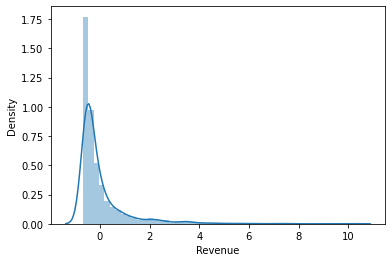

In [250]:
sns.distplot(z_df.Revenue);

In [251]:
mm_df[mm_df.columns[1:]].corr()['Revenue'][:].nlargest(n=46)

Revenue                         1.000000
Budget                          0.693505
imdbNumVotes                    0.630850
Adventure                       0.422015
actors_popularity               0.344022
imdbRating                      0.278273
Sci-Fi                          0.252660
runtimeMinutes                  0.240271
Score_Rotten_Audience           0.233112
Action                          0.215292
tmdb_popularity                 0.198446
director_popularity             0.195305
producer_popularity             0.190379
Score_Rotten                    0.171194
Animation                       0.164302
release_date_quarter__2         0.139522
Rating__1                       0.101123
Fantasy                         0.085215
release_date_year__2019         0.068816
Rating__2                       0.050067
release_date_year__2018         0.043567
release_date_quarter__4         0.042890
release_date_year__2015         0.033381
release_date_year__2017         0.026836
release_date_yea

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



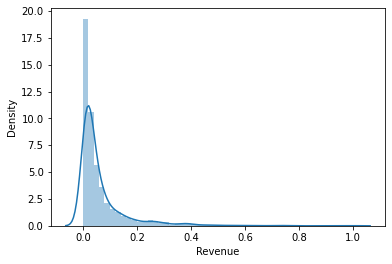

In [252]:
sns.distplot(mm_df.Revenue);

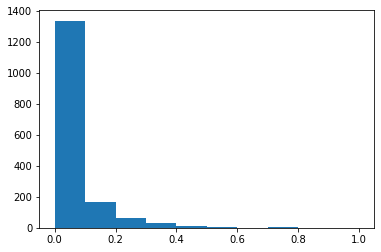

In [253]:
plt.hist(mm_df['Revenue']);

In [254]:
mm_df['Budget']

0       0.001040
1       0.004678
2       0.000415
3       0.007047
4       0.003821
          ...   
1613    0.051055
1614    0.189427
1615    0.023627
1616    0.094684
1617    0.056787
Name: Budget, Length: 1618, dtype: float64

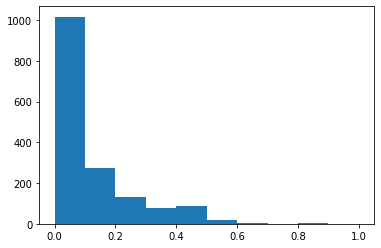

In [255]:
plt.hist(mm_df['Budget']);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



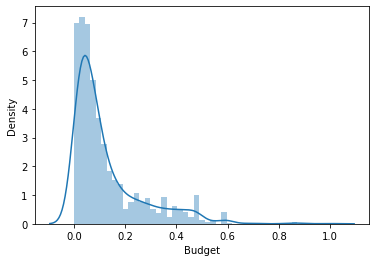

In [256]:
sns.distplot(mm_df.Budget);

/ext3/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



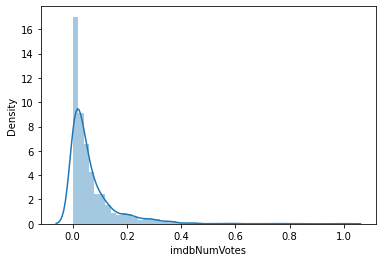

In [257]:
sns.distplot(mm_df.imdbNumVotes);

In [258]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from pandas.plotting import scatter_matrix

# Standardization

In [259]:
scaler = StandardScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale = pd.DataFrame(X_scale, columns=df.columns)
df_scale.head()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,-0.289351,-0.318480,-0.305358,-0.308972,-0.306566,-0.305358,-0.358207,-0.310171,3.314391,-0.290604,...,-0.159212,-0.089998,-0.311367,-0.370182,-0.314936,-0.024868,-0.114672,-0.424453,-0.089998,-0.065918
1,3.456009,-0.318480,-0.305358,-0.308972,-0.306566,-0.305358,-0.358207,-0.310171,-0.301715,-0.290604,...,-0.159212,-0.089998,-0.311367,-0.370182,-0.314936,-0.024868,-0.114672,-0.424453,-0.089998,-0.065918
2,-0.289351,-0.318480,-0.305358,-0.308972,-0.306566,-0.305358,-0.358207,-0.310171,-0.301715,-0.290604,...,-0.159212,-0.089998,-0.311367,-0.370182,-0.314936,-0.024868,-0.114672,-0.424453,-0.089998,-0.065918
3,-0.289351,-0.318480,-0.305358,-0.308972,3.261945,-0.305358,-0.358207,-0.310171,-0.301715,-0.290604,...,-0.159212,-0.089998,-0.311367,-0.370182,-0.314936,-0.024868,-0.114672,-0.424453,-0.089998,-0.065918
4,-0.289351,3.139914,-0.305358,-0.308972,-0.306566,-0.305358,-0.358207,-0.310171,-0.301715,-0.290604,...,-0.159212,-0.089998,-0.311367,-0.370182,3.175247,-0.024868,-0.114672,-0.424453,-0.089998,-0.065918


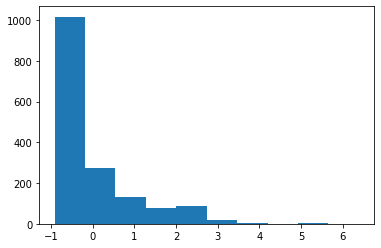

In [260]:
plt.hist(df_scale['Budget']);

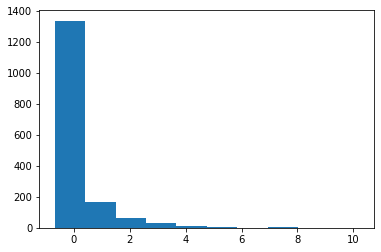

In [261]:
plt.hist(df_scale['Revenue']);

# MIN-MAX SCALER

In [262]:
scaler = MinMaxScaler()
scaler.fit(df)
X_scale = scaler.transform(df)
df_scale_mm = pd.DataFrame(X_scale, columns=df.columns)
df_scale_mm.head()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


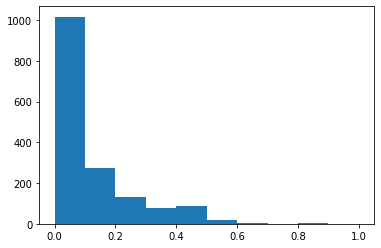

In [263]:
plt.hist(df_scale_mm['Budget']);

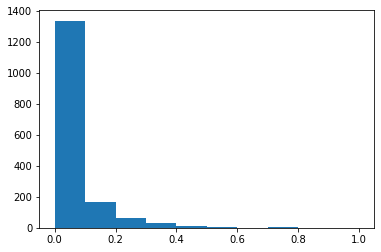

In [264]:
plt.hist(df_scale_mm['Revenue']);

# Feature Selection**

In [265]:
import joblib
import sys

sys.modules['sklearn.externals.joblib'] = joblib

In [266]:
normalized_df = mm_df.copy()

In [267]:
normalized_df.columns

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [269]:
normalized_df['Movie Title'] = li_movies
normalized_df.columns, len(normalized_df.columns)

(Index(['release_date_year__2010', 'release_date_year__2011',
        'release_date_year__2012', 'release_date_year__2013',
        'release_date_year__2014', 'release_date_year__2015',
        'release_date_year__2016', 'release_date_year__2017',
        'release_date_year__2018', 'release_date_year__2019',
        'release_date_year__2020', 'release_date_year__2021',
        'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
        'Rating__4', 'Rating__5', 'release_date_quarter__2',
        'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
        'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
        'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
        'director_popularity', 'producer_popularity', 'actors_popularity',
        'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
        'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
        'Fantasy', 'Film-Noir'

In [270]:
new_normalized_df = normalized_df.drop(labels=['Revenue'], axis=1)
new_normalized_df['Revenue'] = df['Revenue']

In [271]:
#new_normalized_df.to_csv("normalized_df.csv")

In [272]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    normalized_df.drop(labels=['Revenue'], axis=1),
    df['Revenue'],
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((1294, 58), (324, 58))

In [273]:
# information of movie title retention
X_test_movies = X_test.copy()
X_train_movies = X_train.copy()

X_test = X_test.drop('Movie Title', axis=1)
X_train =  X_train.drop('Movie Title', axis=1)

In [274]:
# find and remove correlated features
# in order to reduce the feature space a bit
# so that the algorithm takes shorter

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  0


In [275]:
print(corr_features)

set()


In [276]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1294, 57), (324, 57))

# Random Forest Regressor for Feature Selection

In [277]:
# step forward feature selection
# Select 10 features based on optimal ROC_AUC scoring criteria

sfs1 = SFS(RandomForestRegressor(), 
           k_features=20, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)


In [278]:
sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:   17.4s finished

[2022-05-03 21:40:50] Features: 1/20 -- score: 0.5925148149924798[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:   23.3s finished

[2022-05-03 21:41:14] Features: 2/20 -- score: 0.6994307511216485[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:   32.9s finished

[2022-05-03 21:41:47] Features: 3/20 -- score: 0.7537698057139677[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [279]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__2', 'release_date_quarter__4',
       'imdbNumVotes', 'NumTheatres', 'director_popularity', 'TwitterScore',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Horror',
       'Music', 'Musical', 'Mystery'],
      dtype='object')

# Sequential backward selection

In [280]:
# step backward feature selection
# Using 15 features with ROC_AUC scoring

sfs_backward = SFS(RandomForestRegressor(), 
           k_features=23, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs_backward = sfs_backward.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  2.4min finished

[2022-05-03 21:56:13] Features: 56/23 -- score: 0.7734267221364689[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  2.3min finished

[2022-05-03 21:58:32] Features: 55/23 -- score: 0.7726227220733587[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  2.2min finished

[2022-05-03 22:00:42] Features: 54/23 -- score: 0.7728665545307147[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   34.8s finished

[2022-05-03 22:33:44] Features: 29/23 -- score: 0.792947619741295[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   33.2s finished

[2022-05-03 22:34:17] Features: 28/23 -- score: 0.7933610476170613[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   31.8s finished

[2022-05-03 22:34:49] Features: 27/23 -- score: 0.7938126633083793[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   30.0s finished

[2022-05-03 22:35:19] Features: 26/2

In [281]:
selected_feat_backward= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat_backward

Index(['release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__2', 'release_date_quarter__4',
       'imdbNumVotes', 'NumTheatres', 'director_popularity', 'TwitterScore',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Horror',
       'Music', 'Musical', 'Mystery'],
      dtype='object')

# Exhaustive search feature selection : takes a long long time

In [282]:
# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [283]:
# exhaustive search
# efs1 = EFS(RandomForestRegressor(), 
#            min_features=1,
#            max_features=20, 
#            scoring='r2',
#            print_progress=True,
#            cv=2)

# efs1 = efs1.fit(np.array(X_train), y_train)

In [284]:
#X_train.columns[list(efs1.best_idx_)]

# Mutual Information method

In [285]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [286]:
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([7.18885869e-03, 0.00000000e+00, 3.61977635e-03, 0.00000000e+00,
       1.08163989e-02, 3.69227536e-03, 3.44197361e-03, 0.00000000e+00,
       5.93141996e-03, 1.08315858e-02, 3.79295790e-02, 2.24001922e-02,
       3.63242380e-02, 0.00000000e+00, 1.46797178e-02, 2.44432727e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.48944424e-03,
       0.00000000e+00, 2.72833156e-01, 2.56129456e-02, 2.85201727e-01,
       6.70118792e-03, 5.41036454e-02, 6.12633588e-02, 5.25632580e-01,
       4.59792276e-02, 7.72039884e-02, 6.20838710e-02, 1.29289847e-01,
       8.70297811e-02, 3.71621203e-01, 4.44307693e-02, 9.44370746e-02,
       7.32190980e-03, 1.19021676e-02, 2.31346347e-04, 2.18038348e-02,
       5.73430616e-03, 2.15142223e-02, 0.00000000e+00, 1.07027152e-02,
       2.57599176e-04, 4.61806519e-04, 6.25817927e-03, 1.35786412e-03,
       0.00000000e+00, 1.03920737e-02, 2.46558452e-02, 4.69539630e-02,
       2.57599176e-04, 2.33664223e-03, 2.90241143e-04, 2.50135357e-03,
      

In [287]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

NumTheatres                     0.525633
Budget                          0.371621
imdbNumVotes                    0.285202
tmdb_popularity                 0.272833
actors_popularity               0.129290
Adventure                       0.094437
TwitterScore                    0.087030
director_popularity             0.077204
producer_popularity             0.062084
Score_Rotten_Audience           0.061263
Score_Rotten                    0.054104
Sci-Fi                          0.046954
mean_google_trend_popularity    0.045979
Action                          0.044431
release_date_year__2020         0.037930
release_date_year__2022         0.036324
imdbRating                      0.025613
Romance                         0.024656
Rating__3                       0.024443
release_date_year__2021         0.022400
Crime                           0.021804
Drama                           0.021514
Rating__2                       0.014680
Biography                       0.011902
release_date_yea

<AxesSubplot:>

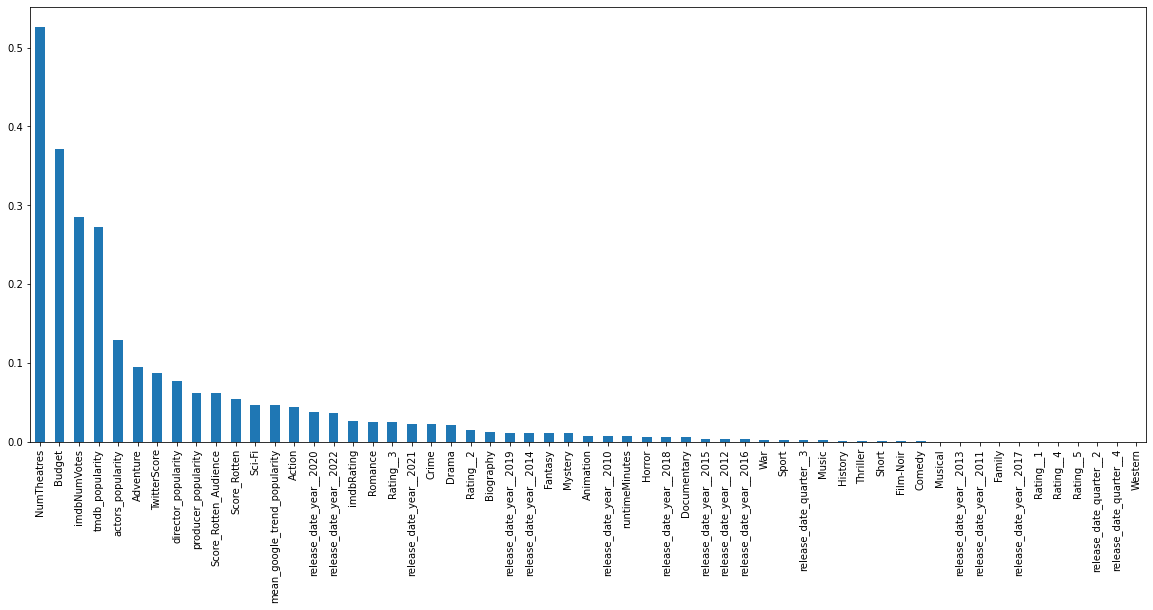

In [288]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [289]:
# Select K best features
k_percentile_features = SelectPercentile(mutual_info_classif, percentile=25).fit(X_train, y_train)
print('Selected top 10 percentile features: {}'.format(X_train.columns[k_percentile_features.get_support()]))

Selected top 10 percentile features: Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1'],
      dtype='object')


# Fischer Score: Chi Square

In [290]:
from sklearn.feature_selection import chi2
# Calcualte the Fisher Score (chi2) between each feature and target
fisher_score = chi2(X_train.fillna(0), y_train)
#fisher_score

In [291]:
p_values = pd.Series(fisher_score[1])
p_values.index = X_train.columns
p_values.sort_values(ascending=False)

mean_google_trend_popularity    1.000000
tmdb_popularity                 1.000000
Drama                           1.000000
Adventure                       1.000000
Action                          1.000000
Budget                          1.000000
TwitterScore                    1.000000
actors_popularity               1.000000
producer_popularity             1.000000
director_popularity             1.000000
NumTheatres                     1.000000
Score_Rotten_Audience           1.000000
Score_Rotten                    1.000000
runtimeMinutes                  1.000000
imdbNumVotes                    1.000000
imdbRating                      1.000000
Comedy                          1.000000
Rating__3                       1.000000
Rating__2                       1.000000
release_date_quarter__3         1.000000
release_date_quarter__4         1.000000
release_date_quarter__2         1.000000
Crime                           0.999973
Thriller                        0.999964
Rating__1       

# Feature Selection-Constant Feature Elimination

In [292]:
from sklearn.feature_selection import VarianceThreshold
# Remove constant features using VarianceThreshold
feature_selector = VarianceThreshold(threshold=0)

# Fit finds the features with zero variance
feature_selector.fit(X_train)
# Get Feature Support
# Returns True if value is not constant else False
feature_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [293]:
# Number of Features that are not constant
sum(feature_selector.get_support())

57

In [294]:
# Features that are constant
[x for x in X_train.columns if x not in X_train.columns[feature_selector.get_support()]]

[]

# Basic Correlation

In [295]:
# Build a Dataframe with Correlation between Features
corr_matrix = X_train.corr()
# Take absolute values of correlated coefficients
corr_matrix = corr_matrix.abs().unstack()
corr_matrix = corr_matrix.sort_values(ascending=False)
#Take only features with correlation above threshold of 0.8
corr_matrix = corr_matrix[corr_matrix >= 0.6]
corr_matrix = corr_matrix[corr_matrix < 1]
corr_matrix = pd.DataFrame(corr_matrix).reset_index()
corr_matrix.columns = ['feature1', 'feature2', 'Correlation']
corr_matrix
# corr_matrix.head()

,feature1,feature2,Correlation
0,Rating__2,Rating__3,0.717215
1,Rating__3,Rating__2,0.717215
2,imdbRating,Score_Rotten_Audience,0.659027
3,Score_Rotten_Audience,imdbRating,0.659027
4,Score_Rotten_Audience,Score_Rotten,0.655910
5,Score_Rotten,Score_Rotten_Audience,0.655910
6,imdbRating,Score_Rotten,0.631456
7,Score_Rotten,imdbRating,0.631456


In [296]:
# Get groups of features that are correlated amongs themselves
grouped_features = []
correlated_groups = []

for feature in corr_matrix.feature1.unique():
    if feature not in grouped_features:
        # Find all features correlated to a single feature
        correlated_block = corr_matrix[corr_matrix.feature1 == feature]
        grouped_features = grouped_features + list(correlated_block.feature2.unique()) + [feature]
        
        # Append block of features to the list
        correlated_groups.append(correlated_block)

print('Found {} correlated feature groups'.format(len(correlated_groups)))
print('out of {} total features.'.format(X_train.shape[1]))
print(correlated_groups)

Found 2 correlated feature groups
out of 57 total features.
[    feature1   feature2  Correlation
0  Rating__2  Rating__3     0.717215,      feature1               feature2  Correlation
2  imdbRating  Score_Rotten_Audience     0.659027
6  imdbRating           Score_Rotten     0.631456]


In [297]:
# Visualize Correlated Feature Groups
for group in correlated_groups:
    print(group)
    print('\n')

    feature1   feature2  Correlation
0  Rating__2  Rating__3     0.717215


     feature1               feature2  Correlation
2  imdbRating  Score_Rotten_Audience     0.659027
6  imdbRating           Score_Rotten     0.631456




# ML without Reducing Features

In [298]:
#training the model
print(normalized_df.columns)
X = normalized_df.drop(['Revenue'], axis=1)
y= df['Revenue'] #prediction
print(X.shape, y.shape)

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [299]:
normalized_df

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,Movie Title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Intimate Strangers
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aftershock
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Eleventh Chapter
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Spanish Affair
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Gantz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gangubai Kathiawadi
1614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Bad Guys
1615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Tiger Rising
1616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The King's Daughter


In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_movies_train = X_train.copy()
X_movies_test = X_test.copy()
y_movies_train = y_train.copy()
y_movies_test = y_test.copy()
X_train = X_train.drop("Movie Title", axis=1)
X_test = X_test.drop("Movie Title", axis=1)

In [301]:
print(len(X_train.columns))
X_train.columns

57


Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Mu

# Machine learning algorithms

# Linear Regression

In [302]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
#linear regression
lm = LinearRegression() #our 6th model
print(X_train.shape, y_train.shape)
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)


(1294, 57) (1294,)


In [303]:
y_test_pred = lm_preds
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 91126892.25
Mean squared error = 2.4048643598971612e+16
Median absolute error = 59633227.13
Explain variance score = 0.62
R2 score = 0.62


# Random forest

In [304]:
#random forrest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))

R-Squared is: 0.6672469412144354


In [305]:
y_test_pred = y_hat
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 63242807.67
Mean squared error = 1.4986520427261136e+16
Median absolute error = 29675952.28
Explain variance score = 0.76
R2 score = 0.76


# LGB MODEL

In [306]:

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [307]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [308]:
lgb_model.fit(X_train, y_train)
predicted_y = lgb_model.predict(X_test)


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2


In [309]:
y_test_pred = predicted_y
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 62851137.11
Mean squared error = 1.2628567570845522e+16
Median absolute error = 32102740.32
Explain variance score = 0.8
R2 score = 0.8


# Gradient Boosting Regressor

In [310]:
#Gradient Boosting Regressor
# Fit regression model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")

/ext3/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



Training Score: 0.9527826214149827


In [311]:
predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)

In [312]:
y_test_pred = predictions2
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 62035723.91
Mean squared error = 1.4581910245598896e+16
Median absolute error = 29105548.89
Explain variance score = 0.77
R2 score = 0.77


In [313]:
#Predictions for the test data
revenue_predictions = clf.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions.head()

,predicted_revenue
0,6.503363e+07
1,4.829977e+07
2,5.089133e+07
3,8.222103e+08
4,3.957875e+08


In [314]:
test_result = pd.concat([X_test, gbr_predictions], axis = 1, sort=True)

test_result.head()

,release_date_year__2010,release_date_year__2011,release_date_year__2012,release_date_year__2013,release_date_year__2014,release_date_year__2015,release_date_year__2016,release_date_year__2017,release_date_year__2018,release_date_year__2019,...,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,predicted_revenue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.503363e+07
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.829977e+07
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.089133e+07
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.222103e+08
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.957875e+08


# SVM

In [315]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)

In [316]:
y_test_pred = np.expand_dims(predictions, axis = 1)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 131962969.51
Mean squared error = 7.0864738867100536e+16
Median absolute error = 53826464.15
Explain variance score = 0.0
R2 score = -0.12


# DT Regressor

In [317]:
from sklearn.tree import DecisionTreeRegressor

dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
predictions = dr.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 91551968.55 degrees.


In [318]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 91551968.55
Mean squared error = 2.968616647812606e+16
Median absolute error = 42625087.0
Explain variance score = 0.53
R2 score = 0.53


# XGBOOST

In [319]:
from xgboost import XGBRegressor
xgboost=XGBRegressor(n_estimators=50)
xgboost.fit(X_train,y_train)
predictions=xgboost.predict(X_test)

In [320]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 65135037.13
Mean squared error = 1.692478485709549e+16
Median absolute error = 28780843.5
Explain variance score = 0.73
R2 score = 0.73


# DNN

In [321]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               7424      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 172,289
Trainable params: 172,289
Non-trainable params: 0
_________________________________________________________________


In [322]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)
predictions = model.predict(X_test)

Epoch 1/500
33/33 [==============================] - 1s 28ms/step - loss: 174379456.4706 - mean_absolute_error: 174379456.4706 - val_loss: 181947920.0000 - val_mean_absolute_error: 181947920.0000
Epoch 2/500
33/33 [==============================] - 0s 9ms/step - loss: 181016357.1765 - mean_absolute_error: 181016357.1765 - val_loss: 181916800.0000 - val_mean_absolute_error: 181916800.0000
Epoch 3/500
33/33 [==============================] - 0s 4ms/step - loss: 169302684.7059 - mean_absolute_error: 169302684.7059 - val_loss: 181467584.0000 - val_mean_absolute_error: 181467584.0000
Epoch 4/500
33/33 [==============================] - 0s 4ms/step - loss: 173045175.5294 - mean_absolute_error: 173045175.5294 - val_loss: 178626480.0000 - val_mean_absolute_error: 178626480.0000
Epoch 5/500
33/33 [==============================] - 0s 4ms/step - loss: 191183610.8235 - mean_absolute_error: 191183610.8235 - val_loss: 167987504.0000 - val_mean_absolute_error: 167987504.0000
Epoch 6/500
33/33 [=====

Epoch 43/500
33/33 [==============================] - 0s 6ms/step - loss: 92207040.0000 - mean_absolute_error: 92207040.0000 - val_loss: 105446744.0000 - val_mean_absolute_error: 105446744.0000
Epoch 44/500
33/33 [==============================] - 0s 6ms/step - loss: 93705472.2353 - mean_absolute_error: 93705472.2353 - val_loss: 104362016.0000 - val_mean_absolute_error: 104362016.0000
Epoch 45/500
33/33 [==============================] - 0s 6ms/step - loss: 82029998.5882 - mean_absolute_error: 82029998.5882 - val_loss: 102766064.0000 - val_mean_absolute_error: 102766064.0000
Epoch 46/500
33/33 [==============================] - 0s 6ms/step - loss: 88204305.4118 - mean_absolute_error: 88204305.4118 - val_loss: 101622080.0000 - val_mean_absolute_error: 101622080.0000
Epoch 47/500
33/33 [==============================] - 0s 6ms/step - loss: 85157768.7059 - mean_absolute_error: 85157768.7059 - val_loss: 100119328.0000 - val_mean_absolute_error: 100119328.0000
Epoch 48/500
33/33 [==========

33/33 [==============================] - 0s 4ms/step - loss: 50972184.0000 - mean_absolute_error: 50972184.0000 - val_loss: 67925624.0000 - val_mean_absolute_error: 67925624.0000
Epoch 128/500
33/33 [==============================] - 0s 4ms/step - loss: 50538975.1765 - mean_absolute_error: 50538975.1765 - val_loss: 67601640.0000 - val_mean_absolute_error: 67601640.0000
Epoch 129/500
33/33 [==============================] - 0s 4ms/step - loss: 52422408.7059 - mean_absolute_error: 52422408.7059 - val_loss: 67589576.0000 - val_mean_absolute_error: 67589576.0000
Epoch 130/500
33/33 [==============================] - 0s 4ms/step - loss: 50152073.4118 - mean_absolute_error: 50152073.4118 - val_loss: 67608832.0000 - val_mean_absolute_error: 67608832.0000
Epoch 131/500
33/33 [==============================] - 0s 4ms/step - loss: 52944033.8824 - mean_absolute_error: 52944033.8824 - val_loss: 67596720.0000 - val_mean_absolute_error: 67596720.0000
Epoch 132/500
33/33 [============================

33/33 [==============================] - 0s 5ms/step - loss: 45175297.6471 - mean_absolute_error: 45175297.6471 - val_loss: 66707568.0000 - val_mean_absolute_error: 66707568.0000
Epoch 212/500
33/33 [==============================] - 0s 5ms/step - loss: 50706369.8824 - mean_absolute_error: 50706369.8824 - val_loss: 66746208.0000 - val_mean_absolute_error: 66746208.0000
Epoch 213/500
33/33 [==============================] - 0s 5ms/step - loss: 46779582.0000 - mean_absolute_error: 46779582.0000 - val_loss: 66745244.0000 - val_mean_absolute_error: 66745244.0000
Epoch 214/500
33/33 [==============================] - 0s 5ms/step - loss: 45926119.0588 - mean_absolute_error: 45926119.0588 - val_loss: 66726764.0000 - val_mean_absolute_error: 66726764.0000
Epoch 215/500
33/33 [==============================] - 0s 5ms/step - loss: 46216647.8824 - mean_absolute_error: 46216647.8824 - val_loss: 66736300.0000 - val_mean_absolute_error: 66736300.0000
Epoch 216/500
33/33 [============================

33/33 [==============================] - 0s 5ms/step - loss: 42297985.7647 - mean_absolute_error: 42297985.7647 - val_loss: 66578836.0000 - val_mean_absolute_error: 66578836.0000
Epoch 296/500
33/33 [==============================] - 0s 5ms/step - loss: 45087724.0000 - mean_absolute_error: 45087724.0000 - val_loss: 66537932.0000 - val_mean_absolute_error: 66537932.0000
Epoch 297/500
33/33 [==============================] - 0s 4ms/step - loss: 43553635.0000 - mean_absolute_error: 43553635.0000 - val_loss: 66430564.0000 - val_mean_absolute_error: 66430564.0000
Epoch 298/500
33/33 [==============================] - 0s 5ms/step - loss: 41086506.7059 - mean_absolute_error: 41086506.7059 - val_loss: 66784008.0000 - val_mean_absolute_error: 66784008.0000
Epoch 299/500
33/33 [==============================] - 0s 5ms/step - loss: 49052545.0588 - mean_absolute_error: 49052545.0588 - val_loss: 66605024.0000 - val_mean_absolute_error: 66605024.0000
Epoch 300/500
33/33 [============================

33/33 [==============================] - 0s 5ms/step - loss: 43302791.1765 - mean_absolute_error: 43302791.1765 - val_loss: 66042140.0000 - val_mean_absolute_error: 66042140.0000
Epoch 380/500
33/33 [==============================] - 0s 5ms/step - loss: 38532004.7059 - mean_absolute_error: 38532004.7059 - val_loss: 65937960.0000 - val_mean_absolute_error: 65937960.0000
Epoch 381/500
33/33 [==============================] - 0s 5ms/step - loss: 35143132.8235 - mean_absolute_error: 35143132.8235 - val_loss: 65967148.0000 - val_mean_absolute_error: 65967148.0000
Epoch 382/500
33/33 [==============================] - 0s 5ms/step - loss: 40268988.4118 - mean_absolute_error: 40268988.4118 - val_loss: 65996064.0000 - val_mean_absolute_error: 65996064.0000
Epoch 383/500
33/33 [==============================] - 0s 5ms/step - loss: 37195677.2353 - mean_absolute_error: 37195677.2353 - val_loss: 66224432.0000 - val_mean_absolute_error: 66224432.0000
Epoch 384/500
33/33 [============================

33/33 [==============================] - 0s 4ms/step - loss: 34674348.5882 - mean_absolute_error: 34674348.5882 - val_loss: 66030152.0000 - val_mean_absolute_error: 66030152.0000
Epoch 464/500
33/33 [==============================] - 0s 4ms/step - loss: 36766624.9412 - mean_absolute_error: 36766624.9412 - val_loss: 66321440.0000 - val_mean_absolute_error: 66321440.0000
Epoch 465/500
33/33 [==============================] - 0s 4ms/step - loss: 36367260.3529 - mean_absolute_error: 36367260.3529 - val_loss: 66177044.0000 - val_mean_absolute_error: 66177044.0000
Epoch 466/500
33/33 [==============================] - 0s 4ms/step - loss: 36950594.7647 - mean_absolute_error: 36950594.7647 - val_loss: 66321728.0000 - val_mean_absolute_error: 66321728.0000
Epoch 467/500
33/33 [==============================] - 0s 5ms/step - loss: 39236422.4706 - mean_absolute_error: 39236422.4706 - val_loss: 65842664.0000 - val_mean_absolute_error: 65842664.0000
Epoch 468/500
33/33 [============================

In [323]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 60903359.31
Mean squared error = 1.3906256280469292e+16
Median absolute error = 24481088.0
Explain variance score = 0.78
R2 score = 0.78


# Feature Reduction

# PCA Analysis

In [622]:
normalized_df['Movie Title'] = li_movies
normalized_df.columns
print(normalized_df.columns)
X = normalized_df.drop(['Revenue'], axis=1)
y= df['Revenue'] #prediction
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_movies_train = X_train.copy()
X_movies_test = X_test.copy()
y_movies_train = y_train.copy()
y_movies_test = y_test.copy()
X_train = X_train.drop("Movie Title", axis=1)
X_test = X_test.drop("Movie Title", axis=1)

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

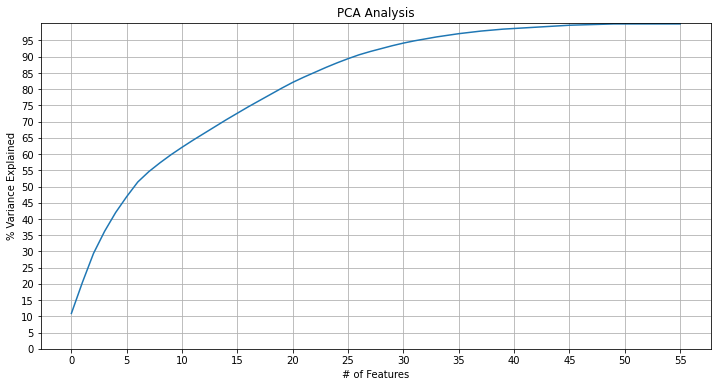

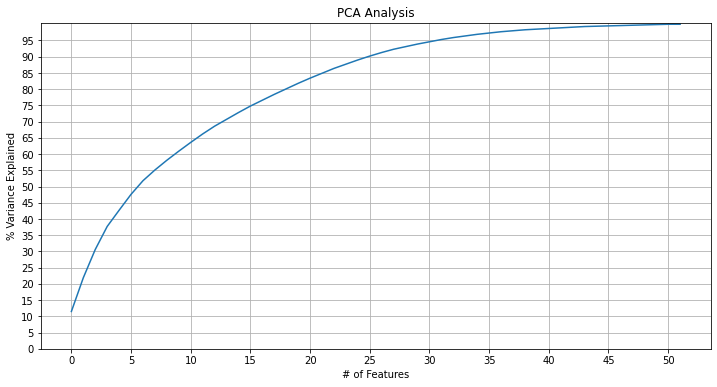

In [623]:
from sklearn.decomposition import PCA

pca = PCA(n_components='mle')
pca.fit(X_train)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(0, 100, step=5))
plt.yticks(np.arange(0, 100, step=5))
plt.grid(which='both')
plt.ylim(0,100.5)
plt.plot(var)

pca = PCA(n_components='mle')
pca.fit(X_test)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(0, 100, step=5))
plt.yticks(np.arange(0, 100, step=5))
plt.grid()
plt.ylim(0,100.5)
plt.plot(var)

In [624]:
# pca = PCA(n_components=3)
# pca.fit(df_scale)
# pca_scale = pca.transform(df_scale)
# pca_df = pd.DataFrame(pca_scale, columns=['pc1', 'pc2', 'pc3'])
# print(pca.explained_variance_ratio_)

In [625]:
pca = PCA(n_components=30)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

# Machine learning algorithms

# Linear Regression

In [626]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
#linear regression
lm = LinearRegression() #our 6th model
print(X_train.shape, y_train.shape)
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)


(1294, 30) (1294,)


In [627]:
y_test_pred = lm_preds
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 211503744.07
Mean squared error = 8.625054004316229e+16
Median absolute error = 176762579.6
Explain variance score = -0.37
R2 score = -0.37


# Random forest

In [584]:
#random forrest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))

R-Squared is: -2.1834239378258444


In [585]:
y_test_pred = y_hat
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 3))

Mean absolute error = 185588059.64
Mean squared error = 8.008194834748162e+16
Median absolute error = 110250852.67
Explain variance score = -0.23
R2 score = -0.269


# LGB MODEL

In [586]:

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [587]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [588]:
lgb_model.fit(X_train, y_train)
predicted_y = lgb_model.predict(X_test)


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2


In [589]:
y_test_pred = predicted_y
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 203497617.51
Mean squared error = 8.876258714965091e+16
Median absolute error = 134634809.37
Explain variance score = -0.36
R2 score = -0.41


# Gradient Boosting Regressor

In [628]:
#Gradient Boosting Regressor
# Fit regression model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")

/ext3/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



Training Score: 0.8954512849738133


In [629]:
predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)

In [631]:
y_test_pred = predictions2
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 194202849.75
Mean squared error = 8.878229926821306e+16
Median absolute error = 116826431.26
Explain variance score = -0.36
R2 score = -0.41


In [632]:
#Predictions for the test data
revenue_predictions = clf.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions.head()

,predicted_revenue
0,8.911303e+07
1,1.093345e+08
2,2.358557e+08
3,2.235383e+08
4,1.180298e+08


In [633]:
# test_result = pd.concat([X_test, gbr_predictions], axis = 1, sort=True)

# test_result.head()

# SVM

In [595]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)

In [596]:
y_test_pred = np.expand_dims(predictions, axis = 1)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 131962974.08
Mean squared error = 7.086474213850583e+16
Median absolute error = 53826466.42
Explain variance score = 0.0
R2 score = -0.12


# DT Regressor

In [597]:
from sklearn.tree import DecisionTreeRegressor

dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
predictions = dr.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 226360858.06 degrees.


In [598]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 226360858.06
Mean squared error = 1.358688218580622e+17
Median absolute error = 113709796.5
Explain variance score = -1.13
R2 score = -1.15


# XGBOOST

In [599]:
from xgboost import XGBRegressor
xgboost=XGBRegressor(n_estimators=50)
xgboost.fit(X_train,y_train)
predictions=xgboost.predict(X_test)

In [600]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 194281187.96
Mean squared error = 8.753720516815026e+16
Median absolute error = 122834621.0
Explain variance score = -0.36
R2 score = -0.39


# DNN

In [601]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_56 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_57 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_58 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 257       
Total params: 168,833
Trainable params: 168,833
Non-trainable params: 0
_________________________________________________________________


In [602]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)
predictions = model.predict(X_test)

Epoch 1/500
33/33 [==============================] - 1s 13ms/step - loss: 184736928.0000 - mean_absolute_error: 184736928.0000 - val_loss: 181948256.0000 - val_mean_absolute_error: 181948256.0000
Epoch 2/500
33/33 [==============================] - 1s 17ms/step - loss: 163611760.7059 - mean_absolute_error: 163611760.7059 - val_loss: 181941632.0000 - val_mean_absolute_error: 181941632.0000
Epoch 3/500
33/33 [==============================] - 1s 23ms/step - loss: 187123704.9412 - mean_absolute_error: 187123704.9412 - val_loss: 181859328.0000 - val_mean_absolute_error: 181859328.0000
Epoch 4/500
33/33 [==============================] - 0s 6ms/step - loss: 189252645.6471 - mean_absolute_error: 189252645.6471 - val_loss: 181368336.0000 - val_mean_absolute_error: 181368336.0000
Epoch 5/500
33/33 [==============================] - 0s 7ms/step - loss: 184358984.9412 - mean_absolute_error: 184358984.9412 - val_loss: 179508864.0000 - val_mean_absolute_error: 179508864.0000
Epoch 6/500
33/33 [===

Epoch 86/500
33/33 [==============================] - 0s 8ms/step - loss: 73780592.4706 - mean_absolute_error: 73780592.4706 - val_loss: 92611536.0000 - val_mean_absolute_error: 92611536.0000
Epoch 87/500
33/33 [==============================] - 0s 8ms/step - loss: 71987085.0588 - mean_absolute_error: 71987085.0588 - val_loss: 92118160.0000 - val_mean_absolute_error: 92118160.0000
Epoch 88/500
33/33 [==============================] - 0s 8ms/step - loss: 68954548.9412 - mean_absolute_error: 68954548.9412 - val_loss: 92589600.0000 - val_mean_absolute_error: 92589600.0000
Epoch 89/500
33/33 [==============================] - 0s 7ms/step - loss: 68439231.0588 - mean_absolute_error: 68439231.0588 - val_loss: 92097520.0000 - val_mean_absolute_error: 92097520.0000
Epoch 90/500
33/33 [==============================] - 0s 8ms/step - loss: 70021384.5882 - mean_absolute_error: 70021384.5882 - val_loss: 92121952.0000 - val_mean_absolute_error: 92121952.0000
Epoch 91/500
33/33 [====================

33/33 [==============================] - 0s 6ms/step - loss: 65827442.2353 - mean_absolute_error: 65827442.2353 - val_loss: 88453720.0000 - val_mean_absolute_error: 88453720.0000
Epoch 171/500
33/33 [==============================] - 0s 5ms/step - loss: 59953827.1765 - mean_absolute_error: 59953827.1765 - val_loss: 88479400.0000 - val_mean_absolute_error: 88479400.0000
Epoch 172/500
33/33 [==============================] - 0s 6ms/step - loss: 66085810.5882 - mean_absolute_error: 66085810.5882 - val_loss: 88397200.0000 - val_mean_absolute_error: 88397200.0000
Epoch 173/500
33/33 [==============================] - 0s 5ms/step - loss: 62152603.4118 - mean_absolute_error: 62152603.4118 - val_loss: 88219776.0000 - val_mean_absolute_error: 88219776.0000
Epoch 174/500
33/33 [==============================] - 0s 6ms/step - loss: 60576371.1765 - mean_absolute_error: 60576371.1765 - val_loss: 88511232.0000 - val_mean_absolute_error: 88511232.0000
Epoch 175/500
33/33 [============================

33/33 [==============================] - 0s 5ms/step - loss: 54996226.1176 - mean_absolute_error: 54996226.1176 - val_loss: 86125832.0000 - val_mean_absolute_error: 86125832.0000
Epoch 255/500
33/33 [==============================] - 0s 5ms/step - loss: 58945391.7647 - mean_absolute_error: 58945391.7647 - val_loss: 85988144.0000 - val_mean_absolute_error: 85988144.0000
Epoch 256/500
33/33 [==============================] - 0s 5ms/step - loss: 56986945.5294 - mean_absolute_error: 56986945.5294 - val_loss: 86165600.0000 - val_mean_absolute_error: 86165600.0000
Epoch 257/500
33/33 [==============================] - 0s 5ms/step - loss: 52063184.7647 - mean_absolute_error: 52063184.7647 - val_loss: 85768104.0000 - val_mean_absolute_error: 85768104.0000
Epoch 258/500
33/33 [==============================] - 0s 5ms/step - loss: 60370243.4118 - mean_absolute_error: 60370243.4118 - val_loss: 86085736.0000 - val_mean_absolute_error: 86085736.0000
Epoch 259/500
33/33 [============================

33/33 [==============================] - 0s 6ms/step - loss: 54709253.4118 - mean_absolute_error: 54709253.4118 - val_loss: 86590112.0000 - val_mean_absolute_error: 86590112.0000
Epoch 339/500
33/33 [==============================] - 0s 6ms/step - loss: 42874784.9412 - mean_absolute_error: 42874784.9412 - val_loss: 86597024.0000 - val_mean_absolute_error: 86597024.0000
Epoch 340/500
33/33 [==============================] - 0s 8ms/step - loss: 44349826.4706 - mean_absolute_error: 44349826.4706 - val_loss: 86475696.0000 - val_mean_absolute_error: 86475696.0000
Epoch 341/500
33/33 [==============================] - 0s 6ms/step - loss: 56643971.8824 - mean_absolute_error: 56643971.8824 - val_loss: 86458936.0000 - val_mean_absolute_error: 86458936.0000
Epoch 342/500
33/33 [==============================] - 0s 5ms/step - loss: 49992064.7647 - mean_absolute_error: 49992064.7647 - val_loss: 86398104.0000 - val_mean_absolute_error: 86398104.0000
Epoch 343/500
33/33 [============================

33/33 [==============================] - 0s 5ms/step - loss: 40545574.5294 - mean_absolute_error: 40545574.5294 - val_loss: 88770832.0000 - val_mean_absolute_error: 88770832.0000
Epoch 423/500
33/33 [==============================] - 0s 5ms/step - loss: 39396707.8824 - mean_absolute_error: 39396707.8824 - val_loss: 88876288.0000 - val_mean_absolute_error: 88876288.0000
Epoch 424/500
33/33 [==============================] - 0s 5ms/step - loss: 43228018.4706 - mean_absolute_error: 43228018.4706 - val_loss: 88828568.0000 - val_mean_absolute_error: 88828568.0000
Epoch 425/500
33/33 [==============================] - 0s 5ms/step - loss: 37087829.4706 - mean_absolute_error: 37087829.4706 - val_loss: 88972056.0000 - val_mean_absolute_error: 88972056.0000
Epoch 426/500
33/33 [==============================] - 0s 5ms/step - loss: 47242836.2353 - mean_absolute_error: 47242836.2353 - val_loss: 88976288.0000 - val_mean_absolute_error: 88976288.0000
Epoch 427/500
33/33 [============================

In [603]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 202988079.7
Mean squared error = 1.0569266309901496e+17
Median absolute error = 110651584.5
Explain variance score = -0.67
R2 score = -0.67


# Reducing Features

**Selected Features: 
'mean_google_trend_popularity', 'tmdb_popularity', 'Drama', 'Adventure', 'Action', 'Budget', 'TwitterScore', 'actors_popularity', 'producer_popularity', 'director_popularity', 'NumTheatres', 'Score_Rotten_Audience', 'Score_Rotten', 'runtimeMinutes', 'imdbNumVotes', 'imdbRating', 'Comedy', 'Rating__3', 'Rating__2', 'release_date_quarter__3', 'release_date_quarter__4', 'release_date_quarter__2', 'Crime', 'Thriller', 'Rating__1', 'Romance', 'Animation', 'Horror', 'Fantasy', 'Sci-Fi', 'Mystery', 'Biography', 'Family'**


In [550]:
#training the model
print(normalized_df.columns)
X = normalized_df.drop(['Revenue'], axis=1)
y= df['Revenue'] #prediction
print(X.shape, y.shape)

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

In [551]:
print(normalized_df.columns)
X = normalized_df.drop(['Revenue'], axis=1)
y= df['Revenue'] #prediction
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)
X_movies_train = X_train.copy()
X_movies_test = X_test.copy()
y_movies_train = y_train.copy()
y_movies_test = y_test.copy()
X_train = X_train.drop("Movie Title", axis=1)
X_test = X_test.drop("Movie Title", axis=1)
X_train.drop(X_train.columns.difference([ 'mean_google_trend_popularity', 'tmdb_popularity', 'Drama', 'Adventure', 'Action', 'Budget', 'TwitterScore', 'actors_popularity', 'producer_popularity', 'director_popularity', 'NumTheatres', 'Score_Rotten_Audience', 'Score_Rotten', 'runtimeMinutes', 'imdbNumVotes', 'imdbRating', 'Comedy', 'Rating__3', 'Rating__2', 'release_date_quarter__3', 'release_date_quarter__4', 'release_date_quarter__2', 'Crime', 'Thriller', 'Rating__1', 'Romance', 'Animation', 'Horror', 'Fantasy', 'Sci-Fi', 'Mystery', 'Biography', 'Family']), 1, inplace=True)
X_test.drop(X_test.columns.difference([ 'mean_google_trend_popularity', 'tmdb_popularity', 'Drama', 'Adventure', 'Action', 'Budget', 'TwitterScore', 'actors_popularity', 'producer_popularity', 'director_popularity', 'NumTheatres', 'Score_Rotten_Audience', 'Score_Rotten', 'runtimeMinutes', 'imdbNumVotes', 'imdbRating', 'Comedy', 'Rating__3', 'Rating__2', 'release_date_quarter__3', 'release_date_quarter__4', 'release_date_quarter__2', 'Crime', 'Thriller', 'Rating__1', 'Romance', 'Animation', 'Horror', 'Fantasy', 'Sci-Fi', 'Mystery', 'Biography', 'Family']), 1, inplace=True)

Index(['release_date_year__2010', 'release_date_year__2011',
       'release_date_year__2012', 'release_date_year__2013',
       'release_date_year__2014', 'release_date_year__2015',
       'release_date_year__2016', 'release_date_year__2017',
       'release_date_year__2018', 'release_date_year__2019',
       'release_date_year__2020', 'release_date_year__2021',
       'release_date_year__2022', 'Rating__1', 'Rating__2', 'Rating__3',
       'Rating__4', 'Rating__5', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Revenue', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'H

/state/partition1/job-18980707/ipykernel_1469299/2562467232.py:12: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/state/partition1/job-18980707/ipykernel_1469299/2562467232.py:13: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [552]:
print(len(X_train.columns), len(X_test.columns))
X_train.columns

33 33


Index(['Rating__1', 'Rating__2', 'Rating__3', 'release_date_quarter__2',
       'release_date_quarter__3', 'release_date_quarter__4', 'tmdb_popularity',
       'imdbRating', 'imdbNumVotes', 'runtimeMinutes', 'Score_Rotten',
       'Score_Rotten_Audience', 'NumTheatres', 'mean_google_trend_popularity',
       'director_popularity', 'producer_popularity', 'actors_popularity',
       'TwitterScore', 'Budget', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller'],
      dtype='object')

# Machine learning algorithms

# Linear Regression

In [553]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
#linear regression
lm = LinearRegression() #our 6th model
print(X_train.shape, y_train.shape)
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)


(1294, 33) (1294,)


In [554]:
y_test_pred = lm_preds
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 89998325.23
Mean squared error = 2.6137177789786052e+16
Median absolute error = 53803340.44
Explain variance score = 0.59
R2 score = 0.59


# Random forest

In [555]:
#random forrest
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(random_state =0, n_estimators=500, max_depth=10)
RF_model.fit(X_train, y_train)

y_hat = RF_model.predict(X_test)
print ("R-Squared is:", metrics.r2_score(y_hat, y_test))

R-Squared is: 0.6848675459375879


In [556]:
y_test_pred = y_hat
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 62809069.3
Mean squared error = 1.4692441458223174e+16
Median absolute error = 27945560.06
Explain variance score = 0.77
R2 score = 0.77


# LGB MODEL

In [557]:

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}

In [558]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)

In [559]:
lgb_model.fit(X_train, y_train)
predicted_y = lgb_model.predict(X_test)


[LightGBM] [Warning] num_threads is set with n_jobs=-1, nthread=4 will be ignored. Current value: num_threads=-1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2


In [560]:
y_test_pred = predicted_y
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 62940450.4
Mean squared error = 1.2645049303379356e+16
Median absolute error = 28877884.86
Explain variance score = 0.8
R2 score = 0.8


# Gradient Boosting Regressor

In [561]:
#Gradient Boosting Regressor
# Fit regression model
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': .01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")

/ext3/miniconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



Training Score: 0.9443713797758019


In [562]:
predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)
y_test_pred = predictions2
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 63536608.76
Mean squared error = 1.492207405510503e+16
Median absolute error = 28341556.18
Explain variance score = 0.76
R2 score = 0.76


In [563]:
#Predictions for the test data
revenue_predictions = clf.predict(X_test)
gbr_predictions = pd.DataFrame(revenue_predictions, columns = ['predicted_revenue'])
gbr_predictions.head()

,predicted_revenue
0,6.038807e+07
1,4.620426e+07
2,5.417646e+07
3,8.530142e+08
4,2.497495e+08


In [564]:
test_result = pd.concat([X_test, gbr_predictions], axis = 1, sort=True)

test_result.head()

,Rating__1,Rating__2,Rating__3,release_date_quarter__2,release_date_quarter__3,release_date_quarter__4,tmdb_popularity,imdbRating,imdbNumVotes,runtimeMinutes,...,Crime,Drama,Family,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller,predicted_revenue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.038807e+07
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.620426e+07
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.417646e+07
3,0.0,1.0,0.0,0.0,0.0,0.0,0.000047,0.513889,0.000031,0.27439,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.530142e+08
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.497495e+08


# SVM

In [565]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(X_train,y_train)
predictions = svm.predict(X_test)

In [566]:
y_test_pred = np.expand_dims(predictions, axis = 1)
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 131962966.45
Mean squared error = 7.086473703242454e+16
Median absolute error = 53826465.77
Explain variance score = 0.0
R2 score = -0.12


# DT Regressor

In [567]:
from sklearn.tree import DecisionTreeRegressor

dr=DecisionTreeRegressor()
dr.fit(X_train,y_train)
predictions = dr.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 88934883.43 degrees.


In [568]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 88934883.43
Mean squared error = 2.9729215306442356e+16
Median absolute error = 39818595.0
Explain variance score = 0.53
R2 score = 0.53


# XGBOOST

In [569]:
from xgboost import XGBRegressor
xgboost=XGBRegressor(n_estimators=50)
xgboost.fit(X_train,y_train)
predictions=xgboost.predict(X_test)

In [570]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 66287644.15
Mean squared error = 1.7506792836511202e+16
Median absolute error = 29272469.5
Explain variance score = 0.72
R2 score = 0.72


# DNN

In [571]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 128)               4352      
_________________________________________________________________
dense_51 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_52 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_53 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 257       
Total params: 169,217
Trainable params: 169,217
Non-trainable params: 0
_________________________________________________________________


In [572]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2)
predictions = model.predict(X_test)

Epoch 1/500
33/33 [==============================] - 1s 14ms/step - loss: 171060753.8824 - mean_absolute_error: 171060753.8824 - val_loss: 181948000.0000 - val_mean_absolute_error: 181948000.0000
Epoch 2/500
33/33 [==============================] - 0s 9ms/step - loss: 170284720.4706 - mean_absolute_error: 170284720.4706 - val_loss: 181922240.0000 - val_mean_absolute_error: 181922240.0000
Epoch 3/500
33/33 [==============================] - 0s 7ms/step - loss: 180357960.0000 - mean_absolute_error: 180357960.0000 - val_loss: 181554736.0000 - val_mean_absolute_error: 181554736.0000
Epoch 4/500
33/33 [==============================] - 0s 7ms/step - loss: 171598525.6471 - mean_absolute_error: 171598525.6471 - val_loss: 179240800.0000 - val_mean_absolute_error: 179240800.0000
Epoch 5/500
33/33 [==============================] - 0s 10ms/step - loss: 171212850.8235 - mean_absolute_error: 171212850.8235 - val_loss: 170494096.0000 - val_mean_absolute_error: 170494096.0000
Epoch 6/500
33/33 [====

Epoch 43/500
33/33 [==============================] - 0s 5ms/step - loss: 91789045.8824 - mean_absolute_error: 91789045.8824 - val_loss: 111571832.0000 - val_mean_absolute_error: 111571832.0000
Epoch 44/500
33/33 [==============================] - 0s 5ms/step - loss: 92677595.5294 - mean_absolute_error: 92677595.5294 - val_loss: 110015512.0000 - val_mean_absolute_error: 110015512.0000
Epoch 45/500
33/33 [==============================] - 0s 5ms/step - loss: 89870986.3529 - mean_absolute_error: 89870986.3529 - val_loss: 109402184.0000 - val_mean_absolute_error: 109402184.0000
Epoch 46/500
33/33 [==============================] - 0s 5ms/step - loss: 95051888.0000 - mean_absolute_error: 95051888.0000 - val_loss: 108550088.0000 - val_mean_absolute_error: 108550088.0000
Epoch 47/500
33/33 [==============================] - 0s 6ms/step - loss: 89683066.3529 - mean_absolute_error: 89683066.3529 - val_loss: 107604200.0000 - val_mean_absolute_error: 107604200.0000
Epoch 48/500
33/33 [==========

33/33 [==============================] - 0s 5ms/step - loss: 66035879.8824 - mean_absolute_error: 66035879.8824 - val_loss: 73480648.0000 - val_mean_absolute_error: 73480648.0000
Epoch 128/500
33/33 [==============================] - 0s 7ms/step - loss: 66854034.9412 - mean_absolute_error: 66854034.9412 - val_loss: 73723672.0000 - val_mean_absolute_error: 73723672.0000
Epoch 129/500
33/33 [==============================] - 0s 6ms/step - loss: 61631529.8824 - mean_absolute_error: 61631529.8824 - val_loss: 73553912.0000 - val_mean_absolute_error: 73553912.0000
Epoch 130/500
33/33 [==============================] - 0s 7ms/step - loss: 57962998.8235 - mean_absolute_error: 57962998.8235 - val_loss: 73484152.0000 - val_mean_absolute_error: 73484152.0000
Epoch 131/500
33/33 [==============================] - 0s 5ms/step - loss: 64722875.1765 - mean_absolute_error: 64722875.1765 - val_loss: 73626728.0000 - val_mean_absolute_error: 73626728.0000
Epoch 132/500
33/33 [============================

33/33 [==============================] - 0s 5ms/step - loss: 55121893.6471 - mean_absolute_error: 55121893.6471 - val_loss: 71657040.0000 - val_mean_absolute_error: 71657040.0000
Epoch 212/500
33/33 [==============================] - 0s 5ms/step - loss: 56947123.0588 - mean_absolute_error: 56947123.0588 - val_loss: 71506056.0000 - val_mean_absolute_error: 71506056.0000
Epoch 213/500
33/33 [==============================] - 0s 5ms/step - loss: 52194576.5882 - mean_absolute_error: 52194576.5882 - val_loss: 71566296.0000 - val_mean_absolute_error: 71566296.0000
Epoch 214/500
33/33 [==============================] - 0s 5ms/step - loss: 57462873.8824 - mean_absolute_error: 57462873.8824 - val_loss: 71691136.0000 - val_mean_absolute_error: 71691136.0000
Epoch 215/500
33/33 [==============================] - 0s 5ms/step - loss: 60839188.1176 - mean_absolute_error: 60839188.1176 - val_loss: 71577064.0000 - val_mean_absolute_error: 71577064.0000
Epoch 216/500
33/33 [============================

33/33 [==============================] - 0s 5ms/step - loss: 58027029.4118 - mean_absolute_error: 58027029.4118 - val_loss: 71615888.0000 - val_mean_absolute_error: 71615888.0000
Epoch 296/500
33/33 [==============================] - 0s 5ms/step - loss: 55124164.8235 - mean_absolute_error: 55124164.8235 - val_loss: 71759776.0000 - val_mean_absolute_error: 71759776.0000
Epoch 297/500
33/33 [==============================] - 0s 5ms/step - loss: 51994029.1765 - mean_absolute_error: 51994029.1765 - val_loss: 71622992.0000 - val_mean_absolute_error: 71622992.0000
Epoch 298/500
33/33 [==============================] - 0s 5ms/step - loss: 55799474.1176 - mean_absolute_error: 55799474.1176 - val_loss: 71789744.0000 - val_mean_absolute_error: 71789744.0000
Epoch 299/500
33/33 [==============================] - 0s 5ms/step - loss: 57576145.4118 - mean_absolute_error: 57576145.4118 - val_loss: 71730088.0000 - val_mean_absolute_error: 71730088.0000
Epoch 300/500
33/33 [============================

33/33 [==============================] - 0s 5ms/step - loss: 51108595.5294 - mean_absolute_error: 51108595.5294 - val_loss: 71961568.0000 - val_mean_absolute_error: 71961568.0000
Epoch 380/500
33/33 [==============================] - 0s 5ms/step - loss: 53090901.2941 - mean_absolute_error: 53090901.2941 - val_loss: 72035520.0000 - val_mean_absolute_error: 72035520.0000
Epoch 381/500
33/33 [==============================] - 0s 4ms/step - loss: 54723767.0588 - mean_absolute_error: 54723767.0588 - val_loss: 71910520.0000 - val_mean_absolute_error: 71910520.0000
Epoch 382/500
33/33 [==============================] - 0s 4ms/step - loss: 50888816.7059 - mean_absolute_error: 50888816.7059 - val_loss: 71974800.0000 - val_mean_absolute_error: 71974800.0000
Epoch 383/500
33/33 [==============================] - 0s 4ms/step - loss: 52476836.5882 - mean_absolute_error: 52476836.5882 - val_loss: 71968432.0000 - val_mean_absolute_error: 71968432.0000
Epoch 384/500
33/33 [============================

33/33 [==============================] - 0s 6ms/step - loss: 45464068.1176 - mean_absolute_error: 45464068.1176 - val_loss: 72473328.0000 - val_mean_absolute_error: 72473328.0000
Epoch 464/500
33/33 [==============================] - 0s 6ms/step - loss: 50235483.2941 - mean_absolute_error: 50235483.2941 - val_loss: 72647080.0000 - val_mean_absolute_error: 72647080.0000
Epoch 465/500
33/33 [==============================] - 0s 6ms/step - loss: 43956446.1765 - mean_absolute_error: 43956446.1765 - val_loss: 72659504.0000 - val_mean_absolute_error: 72659504.0000
Epoch 466/500
33/33 [==============================] - 0s 5ms/step - loss: 47399881.8824 - mean_absolute_error: 47399881.8824 - val_loss: 72767432.0000 - val_mean_absolute_error: 72767432.0000
Epoch 467/500
33/33 [==============================] - 0s 5ms/step - loss: 45565937.4118 - mean_absolute_error: 45565937.4118 - val_loss: 72584608.0000 - val_mean_absolute_error: 72584608.0000
Epoch 468/500
33/33 [============================

In [573]:
y_test_pred = predictions
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 65451287.22
Mean squared error = 2.2841160398874764e+16
Median absolute error = 25954094.0
Explain variance score = 0.64
R2 score = 0.64
